# Assemblytics Analysis

- Inputs: outputs from `DK_0911_assemblytics_analysis` and `Pst_104E_v12_assemblyetics_analysis_submission_21092017`
- Programs: N/A
- Purpose: graphical representation of genomic variants of both genomes.
- Notes: added function that automatically labels bar charts at the correct position above the bars (rather than hand-picking values by trial-and-error), included x-axis scientific notation flexibility, relocated titles, and streamlined font-sizing options.

**Assemblytics** was run with the following parameters:
* anchor of 8000 based on the TE size
* windows either being 10kp or 50kp

In [1]:
%matplotlib inline

In [127]:
import pandas as pd
from Bio import SeqIO
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from itertools import product
import colormap as cmaps
import matplotlib

In [3]:
#define the input folder
ASSEMBLYTICS_FOLDER_DK0911 = '/home/benjamin/genome_assembly/Warrior/Richard/output/nucmer_assemblytics/v04/Assemblytics'
ASSEMBLYTICS_FOLDER_PST104E = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/Assembletics'
#FIGURE_PATH = 

In [14]:
DK0911_df = pd.read_csv(os.path.join(ASSEMBLYTICS_FOLDER_DK0911, 'Assemblytics_summary_df_10kb.df'), index_col=[0,1], header=[0,1])
PST104E_df = pd.read_csv(os.path.join(ASSEMBLYTICS_FOLDER_PST104E, 'Assemblytics_summary_df_10kb.df'), index_col=[0,1], header=[0,1])

In [18]:
#here get the summary of all Types of variations by size intervals given by Assemblytics
DK0911_df_summary_10kb = DK0911_df.sum(level='numbers', axis=1)['Total bp']/1000
index_a = [x.replace(' bp', '') for x in DK0911_df_summary_10kb["Insertion"].index]
var_types = DK0911_df_summary_10kb.index.levels[0]

In [20]:
#here get the summary of all Types of variations by size intervals given by Assemblytics
PST104E_df_summary_10kb = PST104E_df.sum(level='numbers', axis=1)['Total bp']/1000
index_a = [x.replace(' bp', '') for x in DK0911_df_summary_10kb["Insertion"].index]
var_types = PST104E_df_summary_10kb.index.levels[0]

In [27]:
PST104E_df_summary = PST104E_df_summary_10kb.unstack()
PST104E_df_summary['Type'] = PST104E_df_summary.index
PST104E_df = PST104E_df_summary.iloc[:, 0:4].melt()
PST104E_df['strain'] = 'Pst104E'
PST104E_df['Type']= PST104E_df_summary['Type'].tolist()*4

In [111]:
DK0911_df_summary = DK0911_df_summary_10kb.unstack()
DK0911_df_summary['Type'] = DK0911_df_summary.index
DK0911_df = DK0911_df_summary.iloc[:, 0:4].melt()
DK0911_df['strain'] = 'DK0911'
DK0911_df['Type']= DK0911_df_summary['Type'].tolist()*4

In [70]:
PST104E_df_summary['1-10 bp']

Type
Deletion              72.261
Insertion             70.727
Repeat_contraction     0.094
Repeat_expansion       0.092
Tandem_contraction     0.000
Tandem_expansion       0.000
Name: 1-10 bp, dtype: float64

In [31]:
DK0911_df_summary = DK0911_df_summary_10kb.unstack()
DK0911_df_summary['strain'] = 'DK0911'

In [161]:
Merged_df = pd.concat( [PST104E_df,DK0911_df])
Merged_df['log10'] = Merged_df['value'].apply(lambda x: np.log10(x*1000))
Merged_df['log2'] = Merged_df['value'].apply(lambda x: np.log2(x*1000))

In [114]:
Merged_df

,Size range,value,strain,Type
0,1-10 bp,55.754,DK0911,Deletion
1,1-10 bp,56.399,DK0911,Insertion
2,1-10 bp,0.014,DK0911,Repeat_contraction
3,1-10 bp,0.023,DK0911,Repeat_expansion
4,1-10 bp,0.002,DK0911,Tandem_contraction
5,1-10 bp,0.004,DK0911,Tandem_expansion
6,10-50 bp,15.056,DK0911,Deletion
7,10-50 bp,15.848,DK0911,Insertion
8,10-50 bp,0.459,DK0911,Repeat_contraction
9,10-50 bp,0.449,DK0911,Repeat_expansion


In [201]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 20}
label_config_x = {'fontsize'            : 'large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      }
label_config_y = {'fontsize'            : 'large',
      'verticalalignment'   : 'bottom',
      'horizontalalignment' : 'center'
      }
matplotlib.rc('font', **font)


In [ ]:
ax.set_x

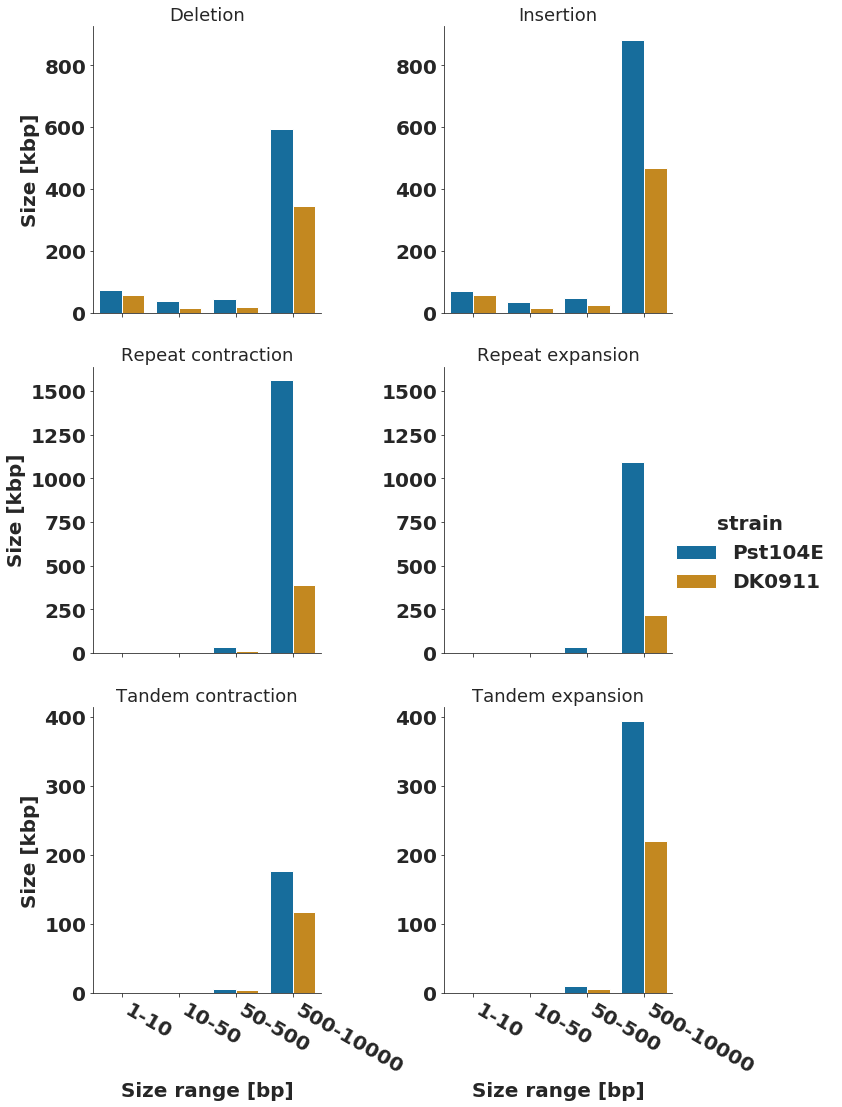

In [205]:
pallete = [sns.color_palette('colorblind')[x] for x in [0,1]]
Titles = ['Deletion', 'Insertion', 'Repeat contraction', 'Repeat expansion', 'Tandem contraction', 'Tandem expansion']
xlables = ['1-10', '10-50', '50-500', '500-10000']
g = sns.catplot(y='value', x='Size range', col= 'Type' , hue='strain',data=Merged_df, kind='bar', col_wrap=2, palette=pallete, sharey=False)
count = 0

#now generate a dictionary of the larger ylims for each row assuming the row is two wide
ylim_dict = {}
for i,ax in enumerate(g.axes):
    if i % 2 == 0:
        ylim_dict[i] = ax.get_ylim()
    else:
        if ylim_dict[i-1][1] < ax.get_ylim()[1]:
            ylim_dict[i-1] = ax.get_ylim()

            

#apply this ylim to each row

ax.set_xticklabels(xlables)

for ax in g.axes:
    
    ax.set_title(Titles[count], fontdict={'size': 18})
    if count < 2:
        ax.set_ylim(ylim_dict[0])
    elif count < 4:
        ax.set_ylim(ylim_dict[2])
    elif count < 6:
        ax.set_ylim(ylim_dict[4])
    count = count + 1 
    for label in ax.get_xticklabels():
        label.set_rotation(-30)
        label.set_horizontalalignment('left')
g.set_ylabels('Size [kbp]', **font)
g.set_xlabels('Size range [bp]', **font)
#g.set_xticklabels(rotation=-30)
#g.set_titles(['Deletion', 'Insertion', 'Repeat Contraction', 'Repeat Expansion', 'Tandem Contraction', 'Tandem expansion'])

In [192]:
count

6

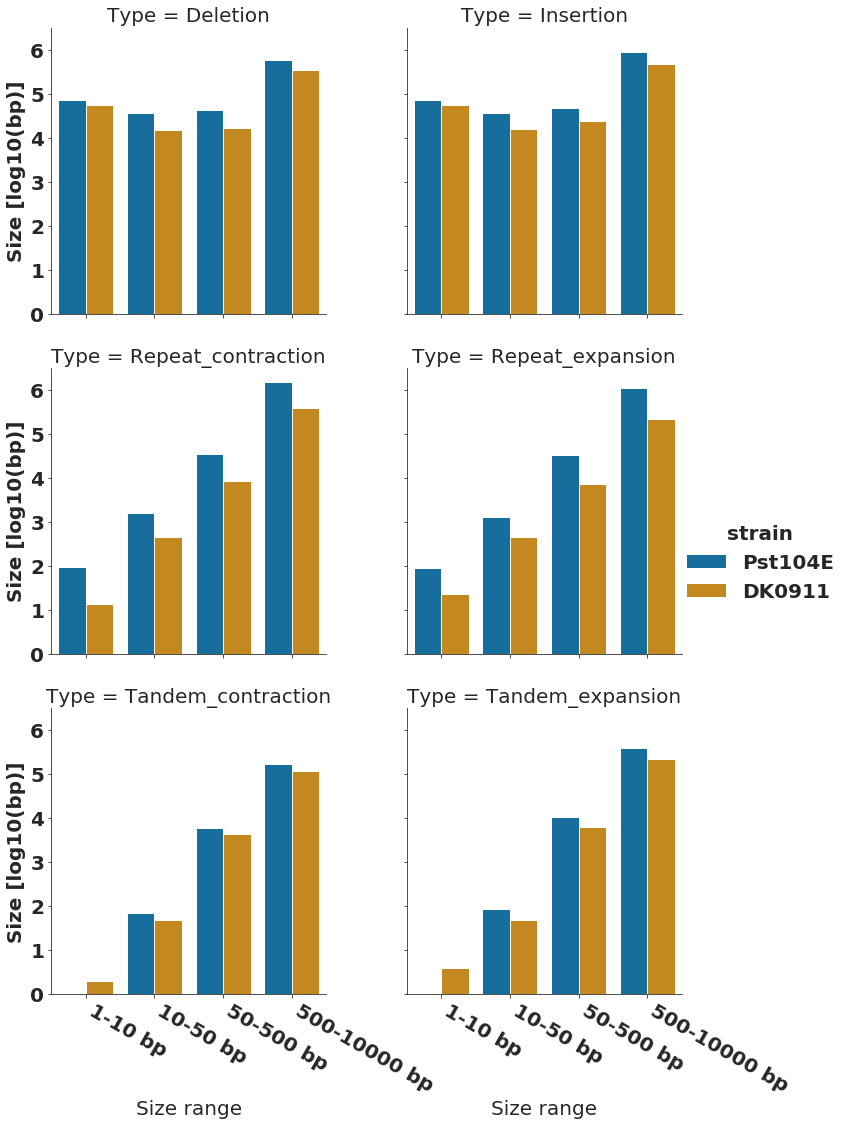

In [163]:
pallete = [sns.color_palette('colorblind')[x] for x in [0,1]]
g = sns.catplot(y='log10', x='Size range', col= 'Type' , hue='strain',data=Merged_df, kind='bar', col_wrap=2, palette=pallete)

for ax in g.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(-30)
        label.set_horizontalalignment('left')
g.set_ylabels('Size [log10(bp)]', **font)